Tutorial for g-h filters

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean:.4f}')


Average of measurements is 164.9844


In [50]:
def gh_filter(data,g,h,x0,dx,dt=1):
    curr_state = x0
    curr_rate = dx
    estimates = [curr_state]
    predictions = []
    for measure in data:
        # Next Prediction
        curr_state = curr_state + curr_rate*dt
        curr_rate = curr_rate
        predictions.append(curr_state)

        # Next Estimate
        next_state = curr_state + g*(measure-curr_state)
        next_rate = curr_rate + h*(measure-curr_state)/dt
        estimates.append(next_state)

        # Update
        curr_state, curr_rate = next_state,next_rate
    return predictions,estimates



In [47]:
def plot_graph(data,pred,est):
    plt.plot(range(1,len(data)+1),data,'ko',label = "Measurements")
    plt.plot(range(1,len(data)+1),pred,'bo',linestyle='-',label = "Prediction")
    plt.plot(range(len(data)+1),est,'r^',linestyle='-',label ="Estimate")
    plt.legend()
    plt.grid()
    plt.show()

[158.0, 159.0, 163.64, 163.862, 162.6466, 162.63338000000002, 164.215434, 168.7800362, 170.22478666, 169.54420093800002, 171.4125892234, 172.54984542761997] [157.0, 158.0, 161.07999999999998, 162.304, 162.2772, 162.42796, 163.420028, 166.3692604, 168.22802172000002, 168.69487199600002, 170.1265205628, 171.32755353404, 172.56990725657198]


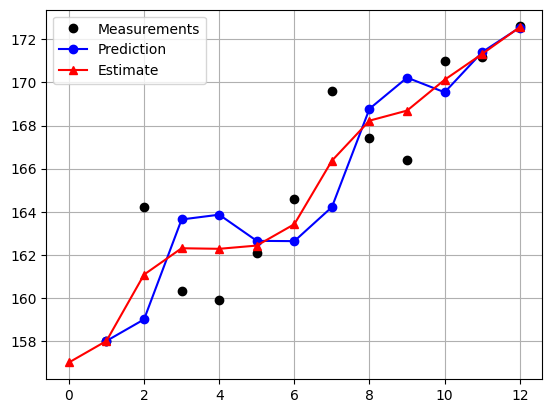

In [48]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day

pred,est = gh_filter(weights,0.4,0.3,157.0,1.0,time_step)

print(pred,est)

plot_graph(weights,pred,est)



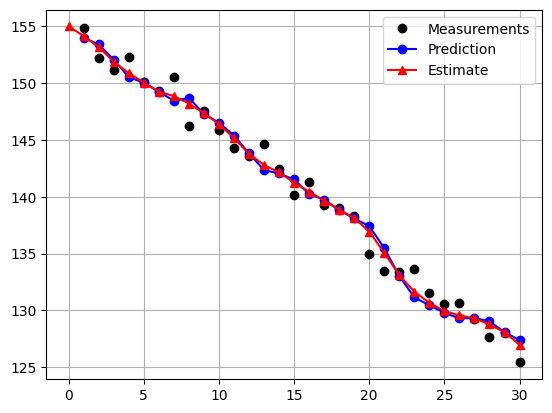

In [56]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(155,-1,30,1)
pred1,est1 = gh_filter(measurements,0.2,0.3,155,-1)

plot_graph(measurements,pred1,est1)


